# Методи обчислювального інтелекта

## Лабораторна робота 2
### Бінарна класифікація зображень за допомогою нейронних мереж

In [ ]:
# Імпортуйте бібліотеки
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import os

In [ ]:
# Завантажте набір даних
import gdown
#  посилання на архів - https://drive.google.com/file/d/1wTHUR2vQ3L_wjEDtYfqtKXXVfHvjMiAT/view?usp=sharing

file_id = "1wTHUR2vQ3L_wjEDtYfqtKXXVfHvjMiAT"
gdown.download(f"https://drive.google.com/uc?id={file_id}", "data.zip", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1wTHUR2vQ3L_wjEDtYfqtKXXVfHvjMiAT
To: /content/data.zip
100%|██████████| 2.67M/2.67M [00:00<00:00, 138MB/s]


'data.zip'

In [ ]:
# Розархівуйте набір даних
from zipfile import ZipFile

# Встановлення шляху до архіву
zip_path = "/content/data.zip"

# Встановлення шляху для розпакування
extract_path = "/content/"

with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

Sample happy image:


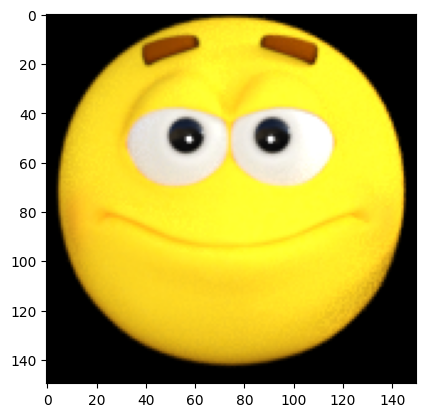


Sample sad image:


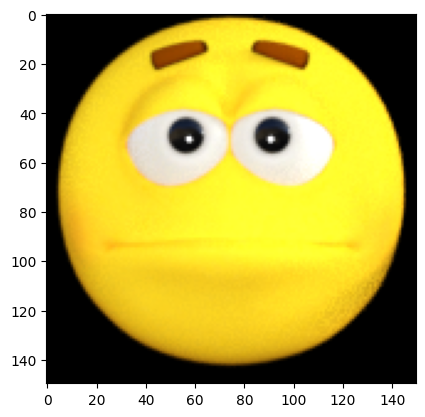

In [ ]:
# Виведіть на екран приклад зображень із обох папок
base_dir = "/content/data"
happy_dir = os.path.join(base_dir, "happy/")
sad_dir = os.path.join(base_dir, "sad/")

print("Sample happy image:")
plt.imshow(load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[0])}"))
plt.show()

print("\nSample sad image:")
plt.imshow(load_img(f"{os.path.join(sad_dir, os.listdir(sad_dir)[0])}"))
plt.show()


In [ ]:
# Визначити розмір кожного зображення і максимальні значення пікселів
# ВСТАВТЕ СЮДИ КОД




Результат роботи коди

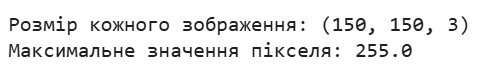

In [ ]:
# Створити колбек функцію для завершення навчання мережі при досягненні
# точності більше 0.999
class myCallback(tf.keras.callbacks.Callback):
   def on_epoch_end(self, epoch, logs={}):
        # ВСТАВТЕ СЮДИ КОД




In [ ]:
# імпортуємо ImageDataGenerator для завантаження зображень різних класів
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:

def image_generator():
    ### ПОЧАТОК КОДУ
        # Не забудьте встановити аргумент rescale.


        # Створіть метод для завантаження зображень з каталогу та передайте
        # відповідні аргументи:
        # - directory: має бути відносним шляхом до каталогу, що містить дані
        # - targe_size: встановіть це значення рівним роздільній здатності кожного зображення (без урахування кольорового виміру)
        # - batch_size: кількість зображень, які генератор видає, коли запитується наступна партія. Встановіть це значення на 10.
        # - class_mode: Як представлені мітки. Має бути одним з "binary", "categorical" або "sparse".
        # Виберіть той варіант, який краще підходить, враховуючи, що мітки будуть 1D-бінарними мітками.



    ### END CODE HERE
    return train_generator

In [ ]:
# Збережіть генератори у змінних
gen = image_generator()

Результат виконання попереднього коду

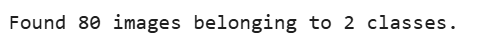

In [ ]:
# Виведіть назви класів і їх числові значення
print(gen.class_indices)

Результат виконання попереднього коду

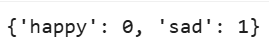

In [ ]:
from tensorflow.keras import optimizers, losses
from tensorflow.keras.optimizers import RMSprop
# GRADED FUNCTION: train_happy_sad_model
def train_happy_sad_model(train_generator, val_generator):
    # Створіть екземляр екземпляр зворотного виклику
    callbacks = myCallback()
    ### ПОЧАТОК КОДУ
    # Визначіть модель



    # Скомпілюйте модель
    # Оберіть функцію втрат, що відповідає функції страт останнього шару мережі



    # Навчіть модель
    # Модель повинна досягти бажаної точності менше, ніж за 15 епох
    # з використанням колбек функції



    ### КІНЕЦЬ КОДА
    return model, history


In [ ]:
model, hist = train_happy_sad_model(gen)

In [ ]:
print(f"Ваша модель досягла бажаної точності за {len(hist.epoch)} епох")

**Можливий** результат виконання попереднього коду

*Перепрошую за орф. помилку.*

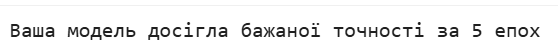

In [ ]:
# Побудуйте графіки точності та втрат тренування

# ВСТАВТЕ КОД СЮДИ




**Приблизний** результат попереднього коду
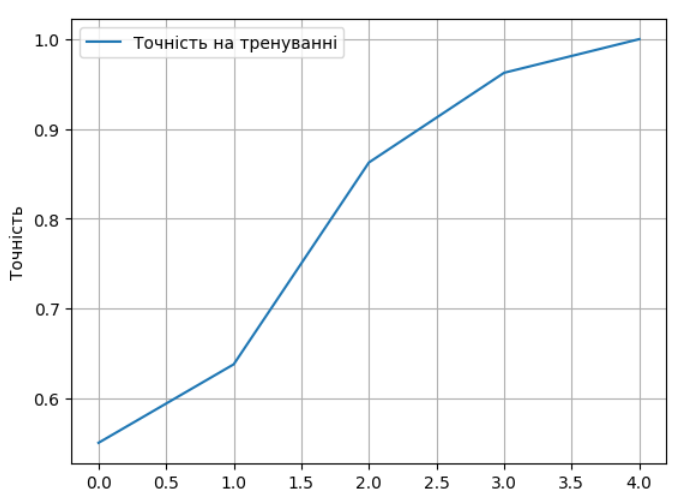


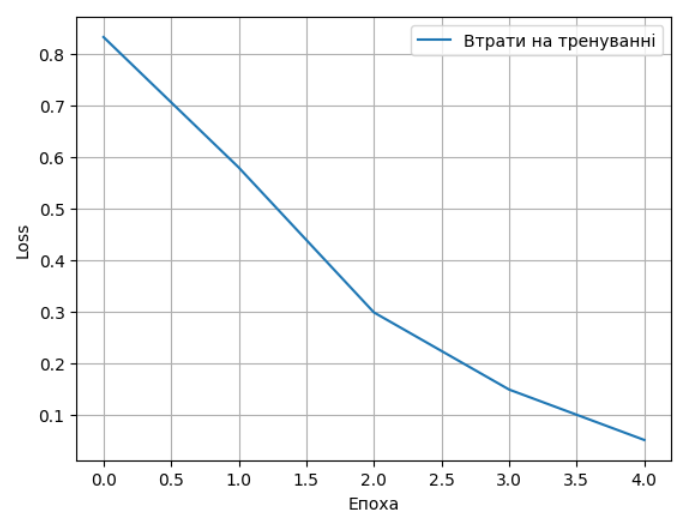

In [ ]:
# Завантажте дані для тестування
# Посилання на архів - https://drive.google.com/file/d/14GFAZ_BQDtm5DCFhjr51k63kxNbXrGLu/view?usp=sharing
!gdown 14GFAZ_BQDtm5DCFhjr51k63kxNbXrGLu

In [ ]:
# Розархівуйте в папку test
!unzip "/content/test.zip" -d "/content/test"

In [ ]:
# Протестуйте модель для одного зображення


# Підготуйте дані для передачі в модель:
# -змініть розмір у відповідності до розміру зображень для тренувань
# -нормалізуйте зображення


**Можливий** результат

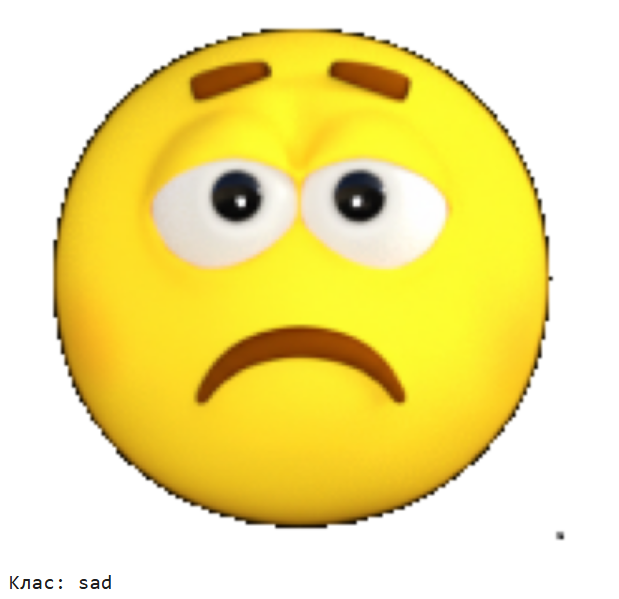

In [ ]:
# Побудуйте матрицю втрат (confusion matrix) та виведіть звіт з класифікації
# для тестового набора
# За бажанням можете додати ще зображення до тестового набора
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# шляхи до зображень
img_dir = "/content/test/"   # тут твої 8 зображень
img_files = os.listdir(img_dir)

# класи з генератора (щоб мати однаковий mapping)
class_labels = list(gen.class_indices.keys())
print("Mapping:", gen.class_indices)

y_true = []
y_pred = []

#ВСТАВТЕ КОД СЮДИ

# побудова confusion matrix
cm = confusion_matrix(y_true, y_pred)

print(classification_report(y_true, y_pred, digits=3))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

**Приблизний** результат виконання коду

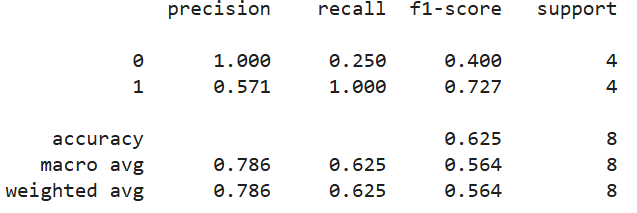

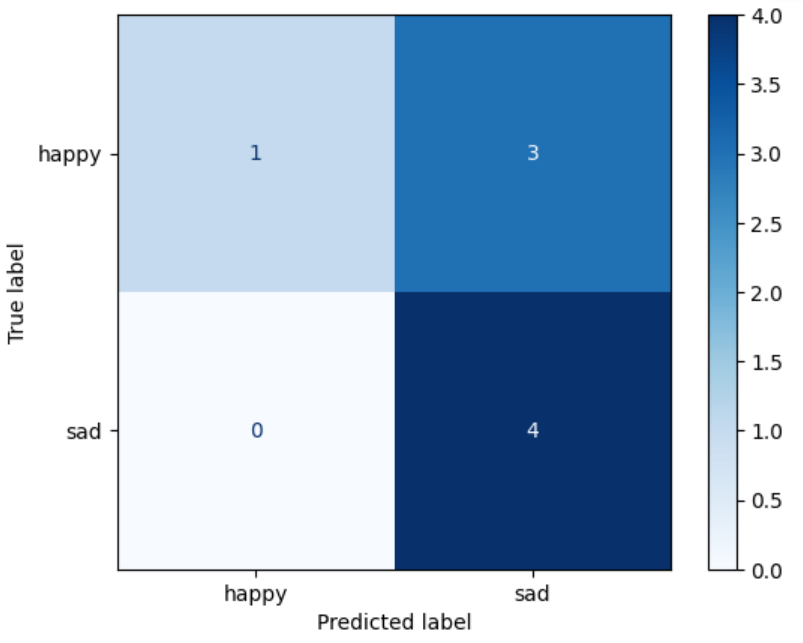

- Зробіть висновки щодо якості навченої моделі.
- Згенеруйте гіпотези щодо можливих причин недостатньої якості створеної моделі.
- Чому висока точність моделі (0,999) не завжди є ознакою якості моделі?
- Чому точність тренування і точність тестування сильно відрізняються?
- Визначте шляхи покращення моделі.